### OTSU Thresholding

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Cargar la Imagen y Convertirla a Escala de Grises
Se carga una imagen y se convierte a escala de grises para reducir la complejidad y facilitar el procesamiento. La conversión permite que los métodos de umbralización y los ruidos sean aplicados sin los matices de color, lo que simplifica la segmentación y el análisis de la estructura de la imagen.

In [17]:
# Cargar la imagen en escala de grises
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

### Aplicar Umbralización de Otsu
En este bloque se emplea la umbralización de Otsu, una técnica que calcula un valor de umbral óptimo de manera automática. Este método es especialmente útil para separar regiones claras y oscuras en imágenes en escala de grises. Para facilitar la comparación, se visualizan tres imágenes: la original en color, la imagen en escala de grises, y la imagen resultante de la umbralización de Otsu.


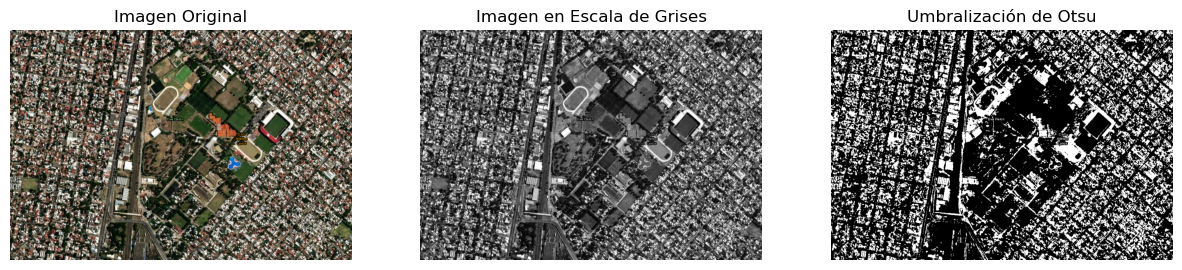

In [19]:
# Aplicar el método de umbralización de Otsu
_, umbral_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(15, 5))

# Imagen en color original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()

### Agregar Ruido Gaussiano
Aquí se añade ruido gaussiano a la imagen en escala de grises. El ruido gaussiano distribuye valores aleatorios sobre la imagen siguiendo una curva de distribución normal, afectando la intensidad de cada píxel. Este bloque permite estudiar cómo responde la umbralización de Otsu a imágenes con ruido aleatorio suave. Se muestran tres versiones: la original en escala de grises, la imagen con ruido gaussiano y la imagen umbralizada.

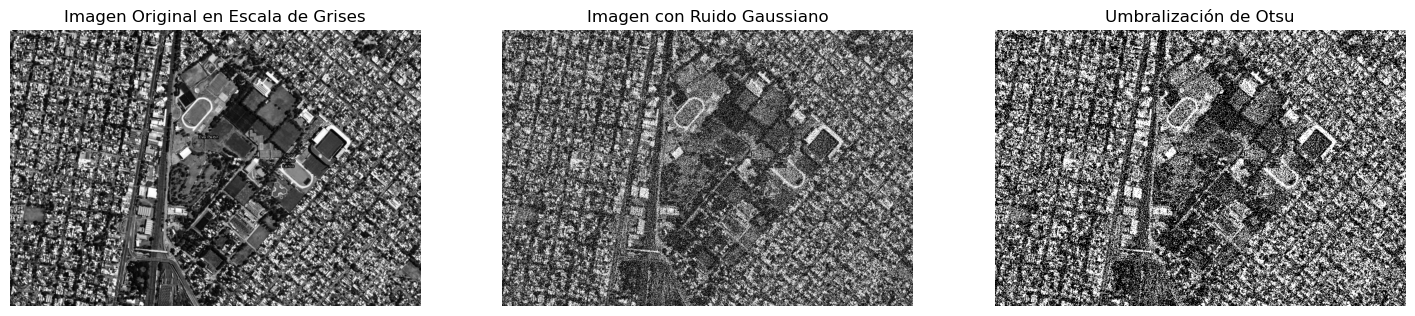

In [35]:
# Función para agregar ruido gaussiano
def agregar_ruido_gaussiano(imagen, mean=0, var=0.1):
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, imagen.shape)
    imagen_ruido = imagen + gauss * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = agregar_ruido_gaussiano(gray_image)
cv2.imwrite('OTSU/imagen_ruido_gaussiano.png', imagen_ruido_gaussiano)

# Aplicar el método de umbralización de Otsu
_, umbral_otsu = cv2.threshold(imagen_ruido_gaussiano, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido Gaussiano
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.title('Imagen con Ruido Gaussiano')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()


### Agregar Ruido Exponencial Multiplicativo
Este bloque introduce ruido exponencial multiplicativo, que aplica un factor aleatorio de intensificación a los píxeles de la imagen. La distribución exponencial amplifica ciertas áreas de la imagen más que otras, simulando un efecto de iluminación desigual. Después de añadir este tipo de ruido, se vuelve a aplicar la umbralización de Otsu para evaluar su desempeño en condiciones de ruido multiplicativo. Se presentan la imagen original en escala de grises, la imagen con ruido exponencial y la imagen umbralizada.


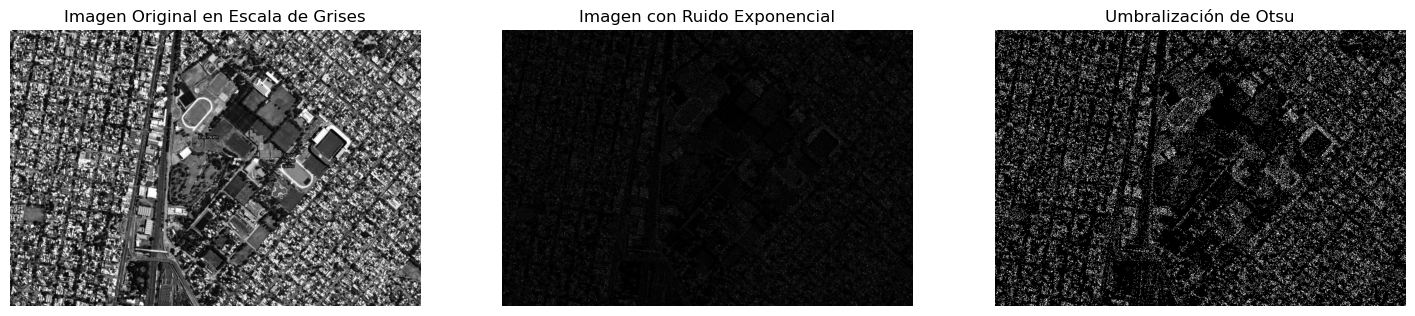

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Función para agregar ruido exponencial multiplicativo
def agregar_ruido_exponencial(imagen, scale=5):
    expo = np.random.exponential(scale, imagen.shape)
    imagen_ruido = imagen * expo
    imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

# Aplicar el ruido exponencial a la imagen en escala de grises
imagen_ruido_exponencial = agregar_ruido_exponencial(gray_image)
cv2.imwrite('OTSU/imagen_ruido_exponencial.png', imagen_ruido_exponencial)

# Aplicar el método de umbralización de Otsu
_, umbral_otsu = cv2.threshold(imagen_ruido_exponencial, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido exponencial
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_exponencial, cmap='gray')
plt.title('Imagen con Ruido Exponencial')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()



### Agregar Ruido de Sal y Pimienta
Finalmente, se añade ruido de sal y pimienta a la imagen. Este tipo de ruido reemplaza aleatoriamente algunos píxeles con valores máximos (blanco) y mínimos (negro), imitando el efecto de partículas blancas y negras en la imagen. Este tipo de ruido es útil para probar la robustez de métodos de procesamiento de imagen ante datos corruptos. El bloque también aplica la umbralización de Otsu para analizar cómo esta técnica responde a la imagen con ruido de sal y pimienta. La visualización incluye la imagen original en escala de grises, la imagen con ruido y la imagen umbralizada.


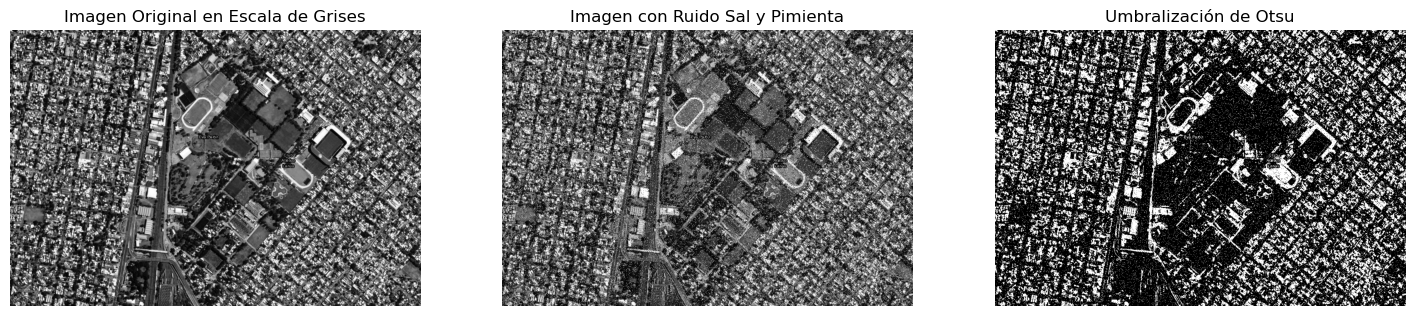

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Función para agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = 255  # Blanco para 'sal'

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = 0  # Negro para 'pimienta'

    return imagen_ruido

# Aplicar el ruido sal y pimienta a la imagen en escala de grises
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(gray_image)
cv2.imwrite('OTSU/imagen_ruido_sal_pimienta.png', imagen_ruido_sal_pimienta)

# Aplicar el método de umbralización de Otsu
_, umbral_otsu = cv2.threshold(imagen_ruido_sal_pimienta, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido de sal y pimienta y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido sal y pimienta
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_sal_pimienta, cmap='gray')
plt.title('Imagen con Ruido Sal y Pimienta')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()
